In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("./datasets/Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Classiification with kNN

Predict **Target** using the following features:
   * **Age** 
   * **Sex** 
   * **ChestPain** 
   * **RestBP** 
   * **Chol** 
   * **Fbs** 
   * **RestECG** 
   * **MaxHR**    

In [3]:
target_col = 'Target'

df = heart_df[['Target', 'Age', 'Sex', 'ChestPain',  'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR']]

df

,Target,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR
0,No,63,1,typical,145,233,1,2,150
1,Yes,67,1,asymptomatic,160,286,0,2,108
2,Yes,67,1,asymptomatic,120,229,0,2,129
3,No,37,1,nonanginal,130,250,0,0,187
4,No,41,0,nontypical,130,204,0,2,172
...,...,...,...,...,...,...,...,...,...
298,Yes,45,1,typical,110,264,0,0,132
299,Yes,68,1,asymptomatic,144,193,1,0,141
300,Yes,57,1,asymptomatic,130,131,0,0,115
301,Yes,57,0,nontypical,130,236,0,2,174


In [4]:
df.dtypes

Target       object
Age           int64
Sex           int64
ChestPain    object
RestBP        int64
Chol          int64
Fbs           int64
RestECG       int64
MaxHR         int64
dtype: object

# Use Imputation to fill in missing values

kNN doesn't work when all of the attributes are not valid all of the attribute columns, so fill in all the missing values in data with the mean of that column.  

We save the mean of each column in a dictionary, `dict_imputation`, whose key is the column name, so we can apply the same imputation to the test set later. 



In [5]:
df['ChestPain']

0           typical
1      asymptomatic
2      asymptomatic
3        nonanginal
4        nontypical
           ...     
298         typical
299    asymptomatic
300    asymptomatic
301      nontypical
302      nonanginal
Name: ChestPain, Length: 303, dtype: object

In [6]:
type(df['ChestPain'])

pandas.core.series.Series

In [7]:
# Check if Contains NaN
df['ChestPain'].isnull().values.sum()

0

In [8]:
# data['ChestPain'] = data.locdata['ChestPain'].map({1: 'typical', 2: 'asymptomatic', 3: 'nonanginal', 4: 'nontypical'})
# Improve the following code with better pandas conde. 

import warnings

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df.loc[df.ChestPain=='typical', 'ChestPain']=1
df.loc[df.ChestPain=='asymptomatic', 'ChestPain']=2
df.loc[df.ChestPain=='nonanginal', 'ChestPain']=3
df.loc[df.ChestPain=='nontypical', 'ChestPain']=4


# Convert Targert to 0 or 1 

df.loc[df.Target=='Yes', 'Target']=1
df.loc[df.Target=='No', 'Target']=0

In [9]:
df

,Target,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR
0,0,63,1,1,145,233,1,2,150
1,1,67,1,2,160,286,0,2,108
2,1,67,1,2,120,229,0,2,129
3,0,37,1,3,130,250,0,0,187
4,0,41,0,4,130,204,0,2,172
...,...,...,...,...,...,...,...,...,...
298,1,45,1,1,110,264,0,0,132
299,1,68,1,2,144,193,1,0,141
300,1,57,1,2,130,131,0,0,115
301,1,57,0,4,130,236,0,2,174


In [10]:
target_col = 'Target'

dict_imputation = dict()
for col in df:
    if col != target_col:
        dict_imputation[col] = df[col].mean(skipna=True)
        df[col].fillna(value=dict_imputation[col],inplace=True)

In [11]:
df

,Target,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR
0,0,63,1,1,145,233,1,2,150
1,1,67,1,2,160,286,0,2,108
2,1,67,1,2,120,229,0,2,129
3,0,37,1,3,130,250,0,0,187
4,0,41,0,4,130,204,0,2,172
...,...,...,...,...,...,...,...,...,...
298,1,45,1,1,110,264,0,0,132
299,1,68,1,2,144,193,1,0,141
300,1,57,1,2,130,131,0,0,115
301,1,57,0,4,130,236,0,2,174


In [12]:
# Check if we still have NaN
df.isnull().sum()

Target       0
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
dtype: int64

# Q3 Normalize all the attributes to be between [0,1]


In [13]:
dict_normalize = dict()
for col in df.columns:
    if col != target_col:
        dict_normalize[col] = (df[col].min(),df[col].max())
        df[col] = (df[col] - dict_normalize[col][0])/(dict_normalize[col][1]-dict_normalize[col][0])

In [14]:
df

,Target,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR
0,0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053
1,1,0.791667,1.0,0.333333,0.622642,0.365297,0.0,1.0,0.282443
2,1,0.791667,1.0,0.333333,0.245283,0.235160,0.0,1.0,0.442748
3,0,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496
4,0,0.250000,0.0,1.000000,0.339623,0.178082,0.0,1.0,0.770992
...,...,...,...,...,...,...,...,...,...
298,1,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649
299,1,0.812500,1.0,0.333333,0.471698,0.152968,1.0,0.0,0.534351
300,1,0.583333,1.0,0.333333,0.339623,0.011416,0.0,0.0,0.335878
301,1,0.583333,0.0,1.000000,0.339623,0.251142,0.0,1.0,0.786260


In [15]:
# Create Test/Train
from sklearn.model_selection import train_test_split

# df2=df.drop(['Target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, df['Target'], test_size=0.2, random_state=123)

In [16]:
X_train

,Target,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR
102,0,0.583333,0.0,0.333333,0.320755,0.404110,0.0,1.0,0.671756
261,1,0.604167,0.0,1.000000,0.396226,0.440639,1.0,1.0,0.618321
228,1,0.520833,1.0,0.333333,0.150943,0.182648,0.0,1.0,0.282443
288,0,0.562500,1.0,1.000000,0.339623,0.216895,0.0,1.0,0.702290
78,0,0.395833,1.0,1.000000,0.339623,0.271689,0.0,1.0,0.832061
...,...,...,...,...,...,...,...,...,...
106,1,0.625000,1.0,0.333333,0.433962,0.116438,0.0,0.0,0.694656
83,1,0.812500,1.0,0.666667,0.811321,0.337900,1.0,1.0,0.603053
17,0,0.520833,1.0,0.333333,0.433962,0.257991,0.0,0.0,0.679389
230,0,0.479167,0.0,0.666667,0.396226,0.159817,0.0,1.0,0.748092


In [17]:
def knn_class(df_train, k, target_col, observation ):
    df_train['distance'] = df_train.apply( lambda x : np.linalg.norm( x.drop(index=target_col) - observation), axis=1 )
    df_train = df_train.sort_values(by='distance').reset_index(drop=True)
    df_k = df_train[0:k]
    return df_k[target_col].value_counts().index[0] 


# Run the actual Prediction using different k 


In [18]:
X_train_droped = X_train.drop([ 'Sex'], axis=1)
X_train_droped = X_test.drop(['Sex'], axis=1)

X_train_droped

,Target,Age,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR
11,0,0.562500,1.000000,0.433962,0.383562,0.0,1.0,0.625954
292,1,0.312500,0.333333,0.245283,0.098174,0.0,0.0,0.557252
269,0,0.270833,0.666667,0.339623,0.123288,0.0,0.0,0.603053
268,1,0.229167,0.333333,0.547170,0.221461,0.0,0.0,0.839695
94,0,0.708333,0.666667,0.386792,0.287671,0.0,1.0,0.770992
...,...,...,...,...,...,...,...,...
95,1,0.479167,0.333333,0.320755,0.294521,0.0,0.0,0.687023
26,0,0.604167,0.666667,0.245283,0.488584,0.0,0.0,0.770992
259,1,0.583333,1.000000,0.283019,0.308219,0.0,0.0,0.534351
143,1,0.729167,0.666667,0.292453,0.417808,0.0,0.0,0.458015


In [19]:
poss_k = [1,3, 8, 13,17, 25, 30, 40, 50, 60, 75, 90, 100, 150, 200]
# poss_k = [30]

acc_k = np.zeros(len(poss_k))

# this takes a few mins ... would probably change the classifier to take a vector of k's to make it faster
acc_indx = 0
for k in poss_k:

    predictions = X_test.apply( lambda x : knn_class(X_train_droped.copy(), k, target_col, x.drop(index=target_col)), axis=1)
    
    correct = np.sum(predictions == X_test[target_col])
    acc_k[acc_indx] = correct/len(predictions)
    
    print("k = ", k , "Acc=", acc_k[acc_indx])
    acc_indx = acc_indx + 1

k =  1 Acc= 0.5409836065573771
k =  3 Acc= 0.5409836065573771
k =  8 Acc= 0.5409836065573771
k =  13 Acc= 0.5409836065573771
k =  17 Acc= 0.5409836065573771
k =  25 Acc= 0.5409836065573771
k =  30 Acc= 0.5409836065573771
k =  40 Acc= 0.5409836065573771
k =  50 Acc= 0.5409836065573771
k =  60 Acc= 0.5409836065573771
k =  75 Acc= 0.5409836065573771
k =  90 Acc= 0.5409836065573771
k =  100 Acc= 0.5409836065573771
k =  150 Acc= 0.5409836065573771
k =  200 Acc= 0.5409836065573771


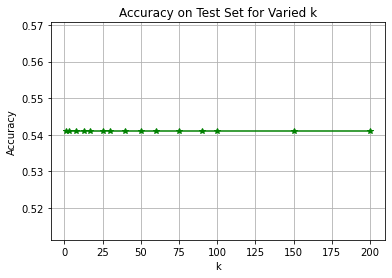

In [20]:
plt.plot(poss_k,acc_k,'g-*')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set for Varied k')
plt.grid('on')
plt.show()

# Use k = 30 as it generates the best Acc.  

We just have 303 samples here 




# Using sklearn.neighbors.KNeighborsClassifier


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    
First we prepare the data for the Scikit-learn 

In [20]:
X_test

,Target,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR
11,0,0.562500,0.0,1.000000,0.433962,0.383562,0.0,1.0,0.625954
292,1,0.312500,1.0,0.333333,0.245283,0.098174,0.0,0.0,0.557252
269,0,0.270833,1.0,0.666667,0.339623,0.123288,0.0,0.0,0.603053
268,1,0.229167,1.0,0.333333,0.547170,0.221461,0.0,0.0,0.839695
94,0,0.708333,0.0,0.666667,0.386792,0.287671,0.0,1.0,0.770992
...,...,...,...,...,...,...,...,...,...
95,1,0.479167,1.0,0.333333,0.320755,0.294521,0.0,0.0,0.687023
26,0,0.604167,0.0,0.666667,0.245283,0.488584,0.0,0.0,0.770992
259,1,0.583333,1.0,1.000000,0.283019,0.308219,0.0,0.0,0.534351
143,1,0.729167,1.0,0.666667,0.292453,0.417808,0.0,0.0,0.458015


In [21]:
X_train.drop(['Target'], axis=1)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR
102,0.583333,0.0,0.333333,0.320755,0.404110,0.0,1.0,0.671756
261,0.604167,0.0,1.000000,0.396226,0.440639,1.0,1.0,0.618321
228,0.520833,1.0,0.333333,0.150943,0.182648,0.0,1.0,0.282443
288,0.562500,1.0,1.000000,0.339623,0.216895,0.0,1.0,0.702290
78,0.395833,1.0,1.000000,0.339623,0.271689,0.0,1.0,0.832061
...,...,...,...,...,...,...,...,...
106,0.625000,1.0,0.333333,0.433962,0.116438,0.0,0.0,0.694656
83,0.812500,1.0,0.666667,0.811321,0.337900,1.0,1.0,0.603053
17,0.520833,1.0,0.333333,0.433962,0.257991,0.0,0.0,0.679389
230,0.479167,0.0,0.666667,0.396226,0.159817,0.0,1.0,0.748092


In [22]:
ytrain=np.array(y_train).astype('int')
ytest=np.array(y_test).astype('int')

In [23]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train.drop(['Target'], axis=1), ytrain)

predictions= neigh.predict(X_test.drop(['Target'], axis=1))

correct = np.sum(predictions == ytest)

print("Acc=", correct/len(predictions))

Acc= 0.6229508196721312


In [24]:
from sklearn.neighbors import KNeighborsClassifier
def knn(k, X_train, X_test, ytrain, ytest):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, ytrain)
    predictions= neigh.predict(X_test)
    correct = np.sum(predictions == ytest)
    return correct/len(predictions)

In [25]:
poss_k = [1,3, 8, 13,17, 25,30, 40, 50, 60, 75, 90, 100, 150, 200]
acc_k = np.zeros(len(poss_k))

# this takes a few mins ... would probably change the classifier to take a vector of k's to make it faster
acc_indx = 0

for k in poss_k:
    acc_k[acc_indx] = knn(k, X_train.drop(['Target'], axis=1), X_test.drop(['Target'], axis=1), ytrain, ytest)
    print("k = ", k , "Acc=", acc_k[acc_indx])
    acc_indx = acc_indx + 1

k =  1 Acc= 0.6229508196721312
k =  3 Acc= 0.6229508196721312
k =  8 Acc= 0.639344262295082
k =  13 Acc= 0.7377049180327869
k =  17 Acc= 0.7213114754098361
k =  25 Acc= 0.7213114754098361
k =  30 Acc= 0.7540983606557377
k =  40 Acc= 0.7049180327868853
k =  50 Acc= 0.7377049180327869
k =  60 Acc= 0.7213114754098361
k =  75 Acc= 0.7377049180327869
k =  90 Acc= 0.7377049180327869
k =  100 Acc= 0.7540983606557377
k =  150 Acc= 0.7540983606557377
k =  200 Acc= 0.6065573770491803


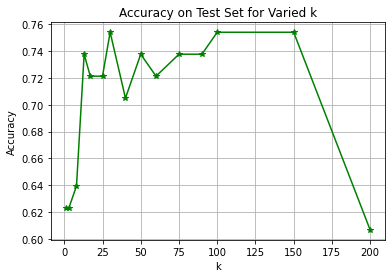

In [26]:
plt.plot(poss_k,acc_k,'g-*')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set for Varied k')
plt.grid('on')
plt.show()